# Requirements

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import pandas as pd
import missingno as msno
import seaborn as sns

# Laboratory Exercise - Run Mode (8 points)

## The Spotify Songs Dataset
The dataset consists of information on more than 30,000 songs obtained from the Spotify API, with various musical features and genres. The features include danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo, and genre. Each feature provides insights into different aspects of the songs, such as danceability, intensity, loudness, presence of spoken words, acoustic nature, instrumental content, live performance likelihood, musical positiveness, tempo, and genre. All these features except 'genre' serve as input variables for potential analysis and modeling. The 'genre' attribute serves as the target variable, representing the song genre to be predicted. The dataset offers a comprehensive collection of attributes, making it suitable for exploring and understanding the musical characteristics of a diverse range of songs.

Load the dataset into a `pandas` data frame.

In [8]:
data = pd.read_csv('spotify-songs-excercise.csv')

In [9]:
data.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0.748,0.916,-2.634,0.0583,0.1020,0.000000,0.0653,0.518,122.036,pop
1,0.726,NaN,-4.969,0.0373,0.0724,NaN,0.3570,0.693,99.972,pop
2,0.675,0.931,-3.432,0.0742,0.0794,NaN,0.1100,0.613,124.008,pop
3,0.718,0.930,-3.778,0.1020,0.0287,0.000009,0.2040,0.277,NaN,pop
4,0.650,0.833,-4.672,0.0359,0.0803,0.000000,0.0833,0.725,123.976,pop


Preprocess the input and the output variables appropriately.

In [10]:
data.isnull().sum()

danceability         3662
energy              11261
loudness             7620
speechiness          2361
acousticness          894
instrumentalness     6470
liveness             2986
valence              7489
tempo                6557
genre                   0
dtype: int64

Explore the dataset using visualizations of your choice.

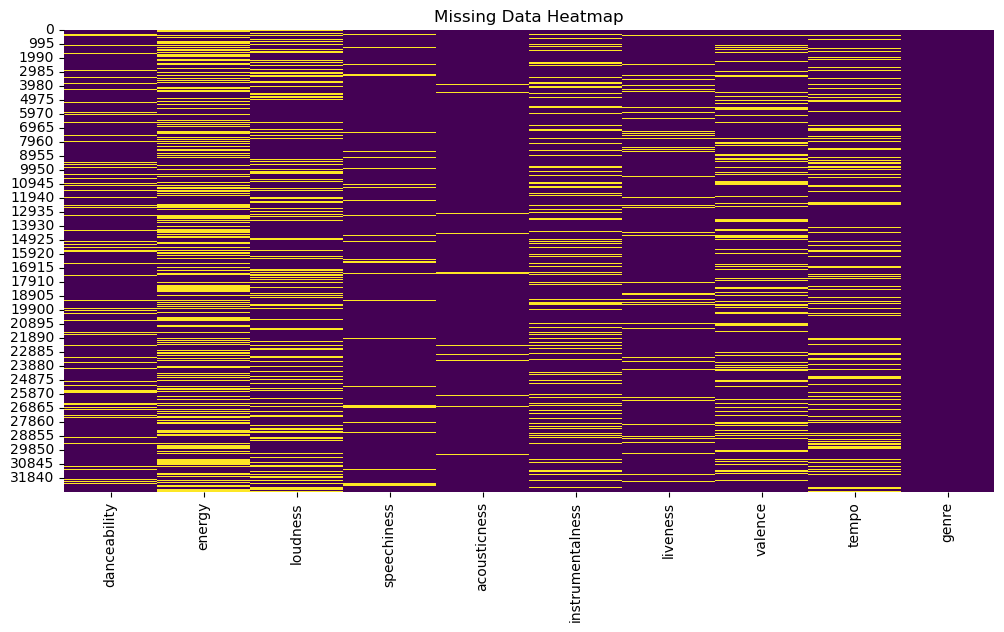

In [14]:
# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

Check if the dataset is balanced.

In [15]:
print(data.describe())

       danceability        energy      loudness   speechiness  acousticness  \
count  29171.000000  21572.000000  25213.000000  30472.000000  31939.000000   
mean       0.655237      0.697964     -6.700534      0.107035      0.175157   
std        0.145108      0.180924      2.975182      0.101335      0.219659   
min        0.000000      0.000175    -36.624000      0.000000      0.000000   
25%        0.563000      0.582000     -8.149000      0.041100      0.015000   
50%        0.672000      0.721000     -6.164000      0.062500      0.080200   
75%        0.761000      0.839000     -4.632000      0.132000      0.254000   
max        0.983000      1.000000      1.275000      0.918000      0.994000   

       instrumentalness      liveness       valence         tempo  
count      26363.000000  29847.000000  25344.000000  26276.000000  
mean           0.083894      0.190442      0.510760    120.905999  
std            0.223003      0.154312      0.233063     26.968530  
min            0

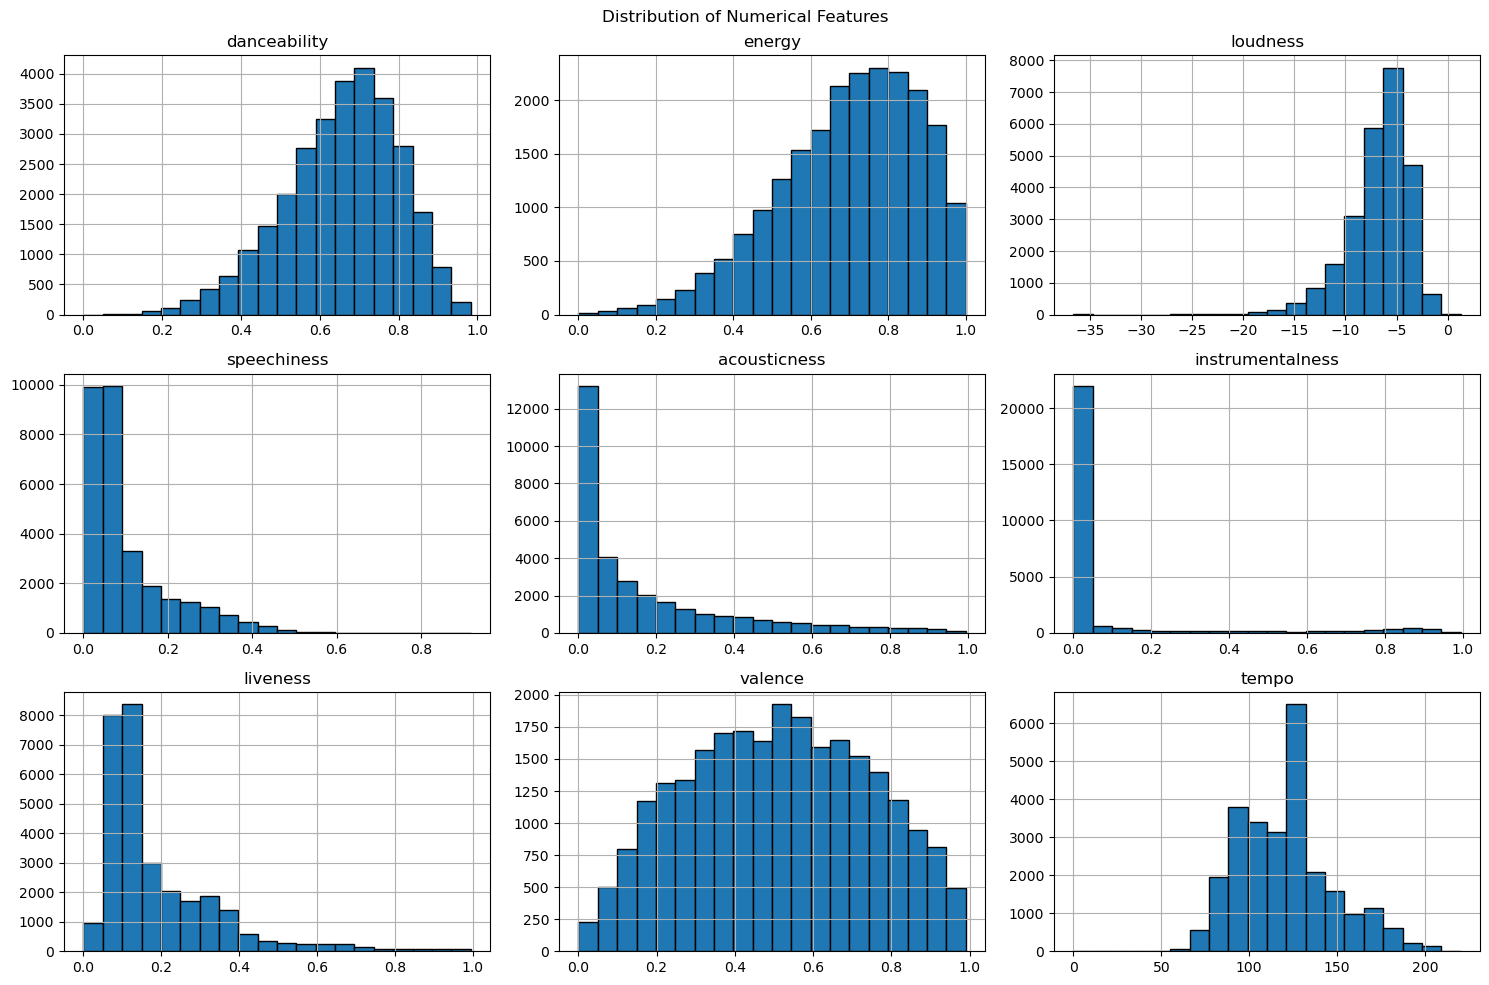

In [16]:
data.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle("Distribution of Numerical Features")
plt.tight_layout()
plt.show()

In [11]:
target_column = 'genre'
class_distribution = data[target_column].value_counts()
print(class_distribution)

edm      6043
rap      5746
pop      5507
r&b      5431
latin    5155
rock     4951
Name: genre, dtype: int64


C:\Users\Drej\AppData\Local\Temp\ipykernel_12548\3358851203.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


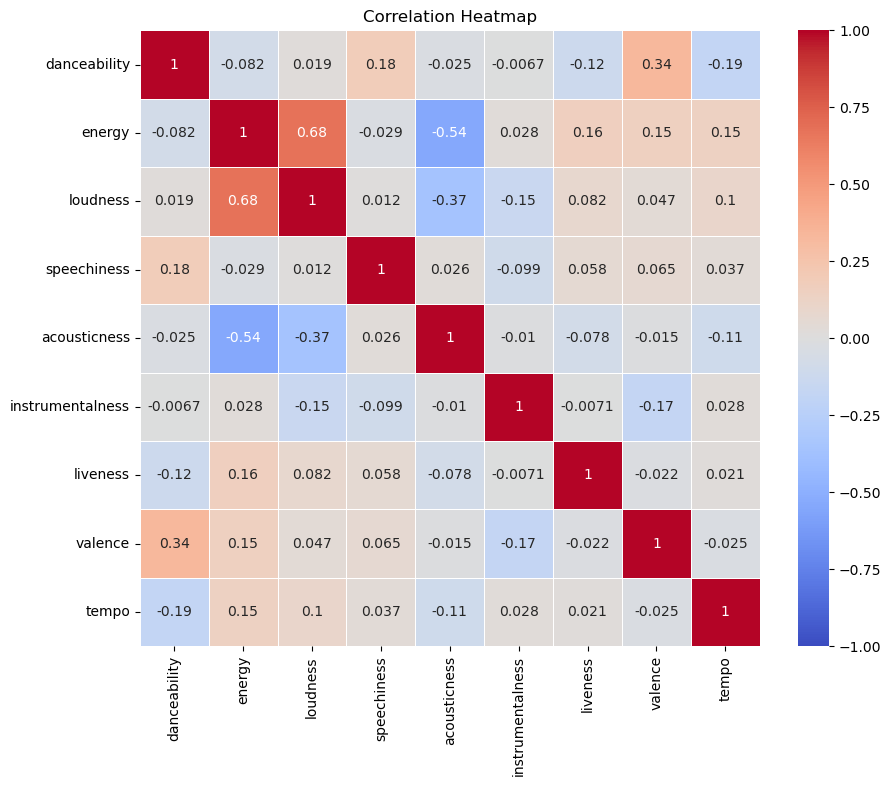

In [17]:
# Correlation heatmap
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [19]:
missing_percent = data.isnull().sum() / len(data) * 100
missing_percent = missing_percent.reset_index().rename(columns={"index": "column", 0: "percent missing"})
missing_percent

,column,percent missing
0,danceability,11.153413
1,energy,34.297810
2,loudness,23.208357
3,speechiness,7.190936
4,acousticness,2.722870
5,instrumentalness,19.705784
6,liveness,9.094509
7,valence,22.809369
8,tempo,19.970761
9,genre,0.000000


## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts.

In [35]:
data.isnull().sum()

danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      29171 non-null  float64
 1   energy            32833 non-null  float64
 2   loudness          25213 non-null  float64
 3   speechiness       30472 non-null  float64
 4   acousticness      31939 non-null  float64
 5   instrumentalness  26363 non-null  float64
 6   liveness          29847 non-null  float64
 7   valence           25344 non-null  float64
 8   tempo             26276 non-null  float64
 9   genre             32833 non-null  object 
dtypes: float64(9), object(1)
memory usage: 2.5+ MB


In [34]:
data.energy = data.energy.fillna(data.energy.median())
data.valence = data.valence.fillna(data.valence.mean())
data.loudness = data.loudness.fillna(data.loudness.median())
data.acousticness = data.acousticness.fillna(data.acousticness.median())
data.instrumentalness = data.instrumentalness.fillna(data.instrumentalness.median())
data.danceability = data.danceability.fillna(data.danceability.median())
data.speechiness = data.speechiness.fillna(data.speechiness.median())
data.liveness = data.liveness.fillna(data.liveness.median())
data.tempo = data.tempo.fillna(data.tempo.median())

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(
    data[data.columns[:-1]],  data['genre'], test_size=0.2)

## Feature Scaling
Standardize the features appropriately.

In [37]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Model Selection

Choose and train an approriate model for the given task.

In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)

KNeighborsClassifier()

Use the trained model to make predictions for the test set.

In [39]:
y_pred = knn.predict(X_test)
y_pred

array(['edm', 'rap', 'rock', ..., 'edm', 'edm', 'edm'], dtype=object)

Assess the performance of the model by using different classification metrics.

In [40]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
f1_score(Y_test, y_pred, average='micro')

0.3957667123496269

# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune at least one hyper-parameter using a cross-validation with grid search. This involves systematically experimenting with various values for the hyper-parameter(s) and evaluating the model's performance using cross-validation. Upon determining the most suitable value(s) for the hyper-parameter(s), evaluate the model's performance on a test set for final assessment.

Hint: Use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(
    data[data.columns[:-1]],  data['genre'], test_size=0.1)

## Feature Scaling
Standardize the features appropriately.

In [54]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Fine-tuning the Hyperparameters
Experiment with various values for the chosen hyperparameter(s) and evaluate the model's performance using cross-validation.

In [56]:
from sklearn.model_selection import GridSearchCV, train_test_split
import numpy as np

knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 30)}

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)  # 5-fold cross-validation
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

## Final Assessment of the Model Performance
Upon determining the most suitable hyperparameter(s), evaluate the model's performance on a test set for final assessment.

In [59]:
best_n_neighbors = grid_search.best_params_['n_neighbors']
print(f"Best n_neighbors: {best_n_neighbors}")

best_knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
best_knn.fit(X_train, Y_train)

Y_pred = best_knn.predict(X_test)
test_accuracy = accuracy_score(Y_test, Y_pred)
print(f"Test set accuracy: {test_accuracy:.4f}")

Best n_neighbors: 27
Test set accuracy: 0.4568
